In [61]:
## ------------- Necesary imports ------------- ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

## Question 1

**Setting:**
Consider a portfolio of $d$ stocks. Let $\lambda_i$ denote the number of shares held in the $i^{th}$ stock and it's price at time $t$ be $S_{i, t}$. We will use the risk factors of $Z_{i,t} = \log(S_{i,t})$. Then, by definition we have the following:

1. $V_t = \sum_{i=1}^{d} \lambda_i e^{Z_{i,t}}$
2. $\mathcal{L}(t, t + \Delta) = - \sum_{i=1}^{d} \lambda_i S_{i,t} e^{X_{i, t + \Delta} - 1}$
3. $\mathcal{L}^{\delta}(t, t + \Delta) = - \sum_{i=1}^{d} \lambda_i S_{i,t} X_{i, t + \Delta}$

**Exercise:**
Now, take $d=1$, $\lambda_1 = 1$ and suppose $X_{1, t + \Delta}$ has mean zero, standard deviation equal to $0.01$ and that $S_{1, t} = 100$. Now for each of the following distributions of $X_{1, t + \Delta}$ we are required to simulate $10,000$ realizations of $\mathcal{L}(t, t + \Delta)$, plot the empirical distribution and calculate the mean and standard deviation of $\mathcal{L}(t, t + \Delta)$.

Once all of this is done, we're required to find the normal probability density function corresponding to mean $0$ and std $0.01$ and plot it "against" each distribution.

The distributions we're given are the following:

1.  $X_{i, t + \Delta}$ as a student's t-distribution with $3$ degrees of freedom.
2.  $X_{i, t + \Delta}$ as a student's t-distribution with $10$ degrees of freedom.
3.  $X_{i, t + \Delta}$ as a student's t-distribution with $50$ degrees of freedom.
4.  $X_{i, t + \Delta}$ as a normal distribution.

Finally, state the exact probability distribution of $\mathcal{L}^{\delta}(t, t + \Delta)$ for each of the previous distributions.

In [46]:
## ------------ Define general parameters ------------ ##
delta = 0.1
lambd = 1
St = 100
n = 10000
sigma_target = 0.01

rows_results = []
total_results = {}

rng = np.random.default_rng(12345)  # Random number generator with a seed for reproducibility

In [47]:
## ----------- Normal density (pdf) function N(0, 0.01) ------------ ##
def normal_pdf(x, mu=0.0, sigma=0.01):
    return (1.0 / (sigma * sqrt(2 * pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

In [63]:
## ------------- Sampling function ------------- ##
def sample_X(dist: str, df: int | None = None, size: int = 1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    if dist == "normal":
        return rng.normal(loc=0.0, scale=sigma_target, size=size)
    elif dist == "t":
        assert df is not None and df > 2, "df must be > 2 to have finite variance"
        # Standard Student-t(df) has variance df/(df-2). Scale to get std = 0.01
        scale = sigma_target / sqrt(df / (df - 2))
        return rng.standard_t(df, size=size) * scale
    else:
        raise ValueError("Unknown distribution")

In [49]:
## ------------- Distributions to consider ------------- ##
distributions = [
    ('t-distribution (3 df)', 't', 3), # df = degrees of freedom
    ('t-distribution (10 df)', 't', 10),
    ('t-distribution (50 df)', 't', 50),
    ('Normal distribution', 'normal', None)
]

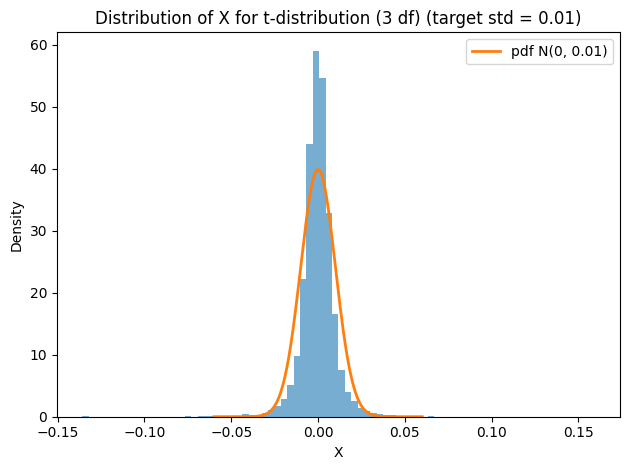

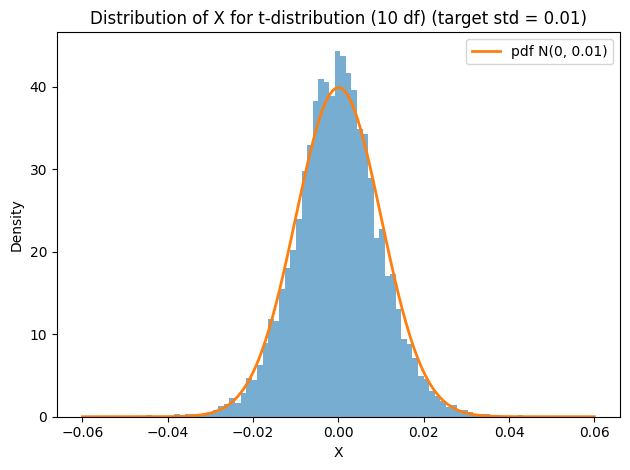

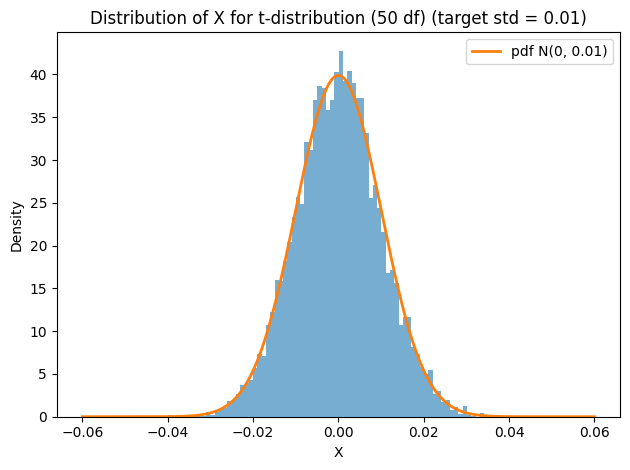

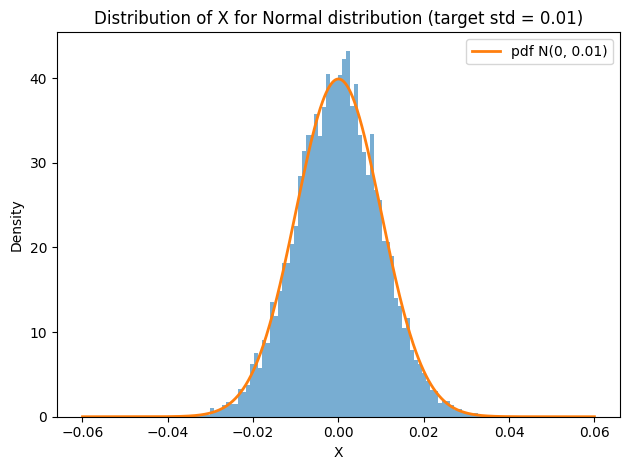

In [56]:
## ------------- Main computation loop ------------- ##
for label, kind, df in distributions:
    # 1) Sample X with mean 0 and std 0.01
    X = sample_X("t" if kind == "t" else "normal", df=df, size=n, rng=rng)
    
    # 2) Compute losses
    L = -St * np.exp(X - 1.0)  # \mathcal{L}(t,t+Δ) = - S * e^{X - 1}
    L_delta = -St * X          # \mathcal{L}^{δ}(t,t+Δ) = - S * X
    
    # 3) Summary stats for L
    L_mean = float(np.mean(L))
    L_std = float(np.std(L, ddof=1))
    rows_results.append({"Case": label, "Mean(L)": L_mean, "Std(L)": L_std})
    total_results[label] = {"X": X, "L": L, "L_delta": L_delta}
    
    # 4) Plot X histogram with overlay Normal(0, 0.01)
    xs = np.linspace(-0.06, 0.06, 600)
    plt.figure()
    plt.hist(X, bins=80, density=True, alpha=0.6)
    plt.plot(xs, normal_pdf(xs), linewidth=2, label='pdf N(0, 0.01)')
    plt.title(f"Distribution of X for {label} (target std = 0.01)")
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [64]:
## --------- Create results DataFrame and display --------- ##
df_results = pd.DataFrame(rows_results)
print(tabulate(df_results, headers='keys', tablefmt='psql'))


+----+------------------------+--------------+----------------+------------------------+-----------+------------+
|    | Case:                  |   E[L^delta] |   Std[L^delta] | Case                   |   Mean(L) |     Std(L) |
|----+------------------------+--------------+----------------+------------------------+-----------+------------|
|  0 | t-distribution (3 df)  |     -36.7938 |       0.366249 | nan                    |  nan      | nan        |
|  1 | t-distribution (10 df) |     -36.7891 |       0.364478 | nan                    |  nan      | nan        |
|  2 | t-distribution (50 df) |     -36.7981 |       0.369294 | nan                    |  nan      | nan        |
|  3 | Normal distribution    |     -36.7941 |       0.365435 | nan                    |  nan      | nan        |
|  4 | nan                    |     nan      |     nan        | t-distribution (3 df)  |  -36.7856 |   0.396451 |
|  5 | nan                    |     nan      |     nan        | t-distribution (10 df) |

## Exact distributions of 𝓛$\mathcal{L}^δ(t, t+Δ)$

We have
$$
\mathcal{L}^{\delta}(t,t+\Delta) \;=\; -\,S\,X, \quad S=100.
$$
All candidate $X$ are symmetric about $0$, so the sign flip does **not** change the family—only the scale. Below, “$t_\nu(\text{loc}=0,\text{scale}=s)$” denotes a Student’s t with $\nu$ degrees of freedom, location 0, scale $s$ (i.e., the law of $s\,T$ for $T\sim t_\nu$).

---

## Normal case
- If $X \sim \mathcal{N}(0, 0.01^2)$, then
  $$
  \mathcal{L}^{\delta} = -100\,X \;\sim\; \mathcal{N}\!\big(0, (100\cdot 0.01)^2\big)
  \;=\; \mathcal{N}(0,1).
  $$

---

## Student’s t cases $(ν = 3, 10, 50)$, with $sd(X) = 0.01$
A standard $t_\nu$ has $\operatorname{Var}(T)=\nu/(\nu-2)$ for $\nu>2$. To target $\operatorname{sd}(X)=0.01$,
$$
X \;=\; \sigma_\nu\,T,\qquad
\sigma_\nu \;=\; \frac{0.01}{\sqrt{\nu/(\nu-2)}} \;=\; 0.01\,\sqrt{\frac{\nu-2}{\nu}}.
$$
Hence
$$
\mathcal{L}^{\delta} \;=\; -100\,X \;=\; -100\,\sigma_\nu\,T
\;\stackrel{d}{=}\; \underbrace{\Big(100\,\sigma_\nu\Big)}_{=\sqrt{(\nu-2)/\nu}}\,T,
$$
so
$$
\boxed{\;\mathcal{L}^{\delta} \;\sim\; t_\nu\!\left(\text{loc}=0,\ \text{scale}=\sqrt{\frac{\nu-2}{\nu}}\right)\;}
$$
and in particular (all centered, unit variance):
- $\nu=3:\quad \mathcal{L}^{\delta} \sim t_3\big(\text{scale}=\sqrt{1/3}\big)$.
- $\nu=10:\ \ \mathcal{L}^{\delta} \sim t_{10}\big(\text{scale}=\sqrt{8/10}\big)$.
- $\nu=50:\ \ \mathcal{L}^{\delta} \sim t_{50}\big(\text{scale}=\sqrt{48/50}\big)$.

(Each has $\operatorname{Var}(\mathcal{L}^{\delta}) = (\nu/(\nu-2))\cdot((\nu-2)/\nu)=1$.)

---